Epoch [10000/20000], Loss: 0.0042
Epoch [20000/20000], Loss: 0.0009


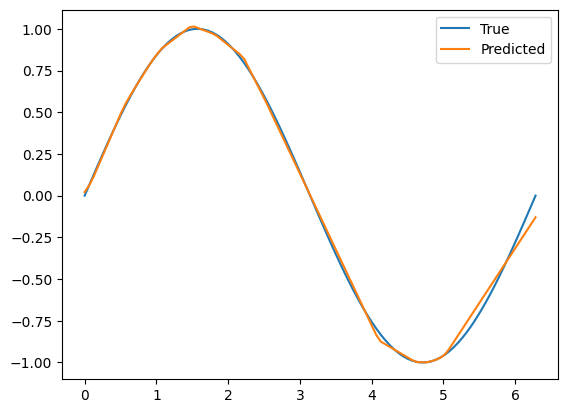

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# Define a simple neural network
class SinNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SinNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
# Hyperparameters
input_size = 1
hidden_size = 64
output_size = 1
learning_rate = 0.01
num_epochs = 20000

# Create the neural network
model = SinNet(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Generate a dataset of sine wave samples
x = torch.unsqueeze(torch.linspace(0, 2 * np.pi, 100), dim=1)
y = torch.sin(x)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_x = torch.unsqueeze(torch.linspace(0, 2 * np.pi, 100), dim=1)
    predicted_y = model(test_x)

# Plot the results
plt.plot(x, y, label='True')
plt.plot(test_x, predicted_y, label='Predicted')
plt.legend()
plt.show()
